In [1]:
import XRDXRFutils.data as xdata
synt = xdata.DataSXRF()

In [2]:
#read from xmso's data directory named "outdata"
datadir = '/home/rosario/xmimsim/synthetic/FeMnCaHg/outdata'
#synt.read(datadir) # very slow
#before calling the read() method, the number of bins, if different from 2048, can be setted
synt.read(datadir)
print(len(synt))

Reading SXRF data from /home/rosario/xmimsim/synthetic/FeMnCaHg/outdata
Error while parsing
/home/rosario/xmimsim/synthetic/FeMnCaHg/outdata/sxrf.h5
12375


In [3]:
print(type(synt.spe_objs)) #is a list of SpectraSXRF objects (see XRDXRFutils/spectra.py)
print(type(synt.spe_objs[0]))
symbols = ["Pb", "Fe", "Mn", "Ca", "Hg"]
lines = ["L", "K", "K", "K", "L"]
synt = synt.get_data_and_labels(symbols, lines) #get the data (inputs) and labels (targets) and store symbols and
# lines as metadata
# now synt.data synt.energy and synt.labels attributes exist
print(synt.data.shape)
print(synt.energy.shape)
print(synt.labels.shape)

<class 'list'>
<class 'XRDXRFutils.spectra.SpectraSXRF'>
(12375, 2048)
(2048,)
(12375, 5)


In [4]:
#save hdf5 file
import glob
import os
synt.save_h5("/home/rosario/xmimsim/synthetic/FeMnCaHg/FeMnCaHg_1024_data.h5") # default name = class name
print(glob.glob(os.path.join(datadir, "*.h5")))
print(glob.glob(os.path.join('/home/rosario/xmimsim/synthetic/FeMnCaHg', "*.h5")))

Saving: /home/rosario/xmimsim/synthetic/FeMnCaHg/FeMnCaHg_1024_data.h5
['/home/rosario/xmimsim/synthetic/FeMnCaHg/outdata/sxrf.h5']
['/home/rosario/xmimsim/synthetic/FeMnCaHg/FeMnCaHg_1024_data.h5']


In [5]:
sim_par = synt.get_sim_parameters() # get simulation parameters (used for hdf5 file)
print(sim_par.reflayer_elements.shape)
print(sim_par.reflayer_thickness.shape)
print(sim_par.sublayer_thickness.shape)
print(sim_par.weight_fractions.shape)

(12375, 4)
(12375,)
(12375,)
(12375, 4)


In [6]:
#another method
import os
synt = xdata.DataSXRF()
symbols = ["Pb", "Fe", "Mn", "Ca", "Hg"]
lines = ["L", "K", "K", "K", "L"]
datadir = '/home/rosario/xmimsim/synthetic/FeMnCaHg/outdata/Fe-Mn-Ca-Hg'
xmso_fnames = [os.path.join(datadir, f) for f in os.listdir(datadir)] # or another way to collect xmso files
synt.spe_objs = [s for s in synt.__read__(xmso_fnames[:100])] #only the first 100 just for explanation
synt = synt.get_data_and_labels(symbols, lines) #as above
print(synt.data.shape)
print(synt.energy.shape)
print(synt.labels.shape)

(100, 2048)
(2048,)
(100, 5)


In [7]:
#save hdf5 file
synt.save_h5('/home/rosario/test_h5.h5')

Saving: /home/rosario/test_h5.h5


In [9]:
#read from hdf5
synt = xdata.DataSXRF()
h5fname = '/home/rosario/xmimsim/synthetic/FeMnCaHg/FeMnCaHg_1024_data.h5'
synt.load_h5(h5fname)
print("data shape",synt.data.shape)
print("energy shape",synt.energy.shape)
print("labels shape",synt.labels.shape)
print("reflayer elements shape",synt.reflayer_elements.shape)
print("reflayer thickness shape",synt.reflayer_thickness.shape)
print("sublayer thickness shape",synt.sublayer_thickness.shape)
print("weight fractions shape",synt.weight_fractions.shape)
print("\nmetadata\n")
for k, v in synt.metadata.items():
    print(k,v)

Loading: /home/rosario/xmimsim/synthetic/FeMnCaHg/FeMnCaHg_1024_data.h5
data shape (12375, 2048)
energy shape (2048,)
labels shape (12375, 5)
reflayer elements shape (12375, 4)
reflayer thickness shape (12375,)
sublayer thickness shape (12375,)
weight fractions shape (12375, 4)

metadata

lines ['L' 'K' 'K' 'K' 'L']
symbols ['Pb' 'Fe' 'Mn' 'Ca' 'Hg']


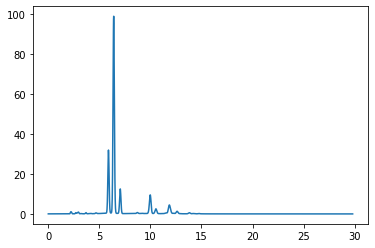

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(synt.energy, synt.data[42,:])
plt.show()

In [ ]:
#load_h5 method
def load_h5(self,filename):

    print('Loading:',filename)
    with h5py.File(filename,'r') as f:
                
        self.parameters = SimParameters() # SimParameters is a datastruct in data.py
        self.data = f['inputs'][:]
        self.labels = f['targets'][:]
        self.reflayer_thickness = f['reflayer_thickness'][:]
        self.sublayer_thickness = f['sublayer_thickness'][:]
        self.reflayer_elements = f['reflayer_elements'][:]
        self.weight_fractions = f['weight_fractions'][:]
        self.energy = f['energy'][:]

        for k,v in f.attrs.items():
            self.metadata[k] = v

In [11]:
# select data in a reference layers thickness range
rl_range = [4.2e-4, 5.7e-4]
condition = (synt.reflayer_thickness > rl_range[0]) & (synt.reflayer_thickness < rl_range[1])
print(synt.data[condition,:].shape)
condition = lambda x, r: (x > r[0]) & (x < r[1])

(1650, 2048)


sorted rl thickness
 [1.0000e-07 7.1520e-05 1.4294e-04 ... 7.8574e-04 2.8579e-04 2.1436e-04]
sorted sl thickness
 [1.e-07 1.e-07 1.e-07 ... 9.e-05 9.e-05 9.e-05]
sorted weight fractions
 [[ 1.   48.    1.   50.  ]
 [30.4  50.95 17.65  1.  ]
 [50.    1.   48.    1.  ]
 ...
 [10.8  44.1  44.1   1.  ]
 [50.   48.    1.    1.  ]
 [30.4   1.   67.6   1.  ]]
first and 42'th spectra in sorted data



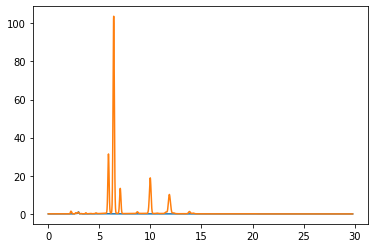

In [12]:
#sort by sublayer thickness
sorted_val= sorted(
    zip(
        range(
            len(synt.sublayer_thickness)
        ), synt.sublayer_thickness), key = lambda x: x[1]
)
sorted_index = [i[0] for i in sorted_val]
#or 
sorted_index = [i[0] for i in sorted(enumerate(synt.sublayer_thickness), key = lambda x: x[1])]
print("sorted rl thickness\n",synt.reflayer_thickness[sorted_index])
print("sorted sl thickness\n",synt.sublayer_thickness[sorted_index])
print("sorted weight fractions\n",synt.weight_fractions[sorted_index])
print("first and 42'th spectra in sorted data\n")
fig,ax = plt.subplots()
ax.plot(synt.energy,synt.data[sorted_index[0],:])
ax.plot(synt.energy, synt.data[sorted_index[42],:])
plt.show()

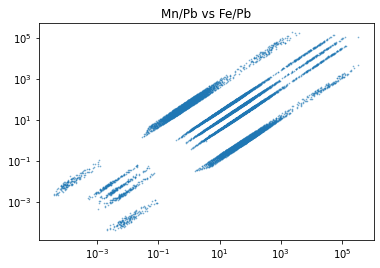

In [14]:
#select Fe, Mn and Pb labels
Fe = synt.labels[:,(synt.metadata["symbols"] == "Fe")]
Mn = synt.labels[:,(synt.metadata["symbols"] == "Mn")]
Pb = synt.labels[:,(synt.metadata["symbols"] == "Pb")]
fig,ax = plt.subplots()
ax.scatter(Fe/Pb, Mn/Pb, s = 0.5, alpha = 0.5)
ax.set_title("Mn/Pb vs Fe/Pb")
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

In [17]:
#select Mn weight fractions
#Pb is not present in reference layers so we skip index zero (Pb) in metadata["symbols"] always at the first index
Mnwf = synt.weight_fractions[:, (synt.metadata["symbols"][1:] == "Mn")]
print(Mnwf)
print("Mnwf set", set(Mnwf.ravel()))

[[29.4 ]
 [ 1.  ]
 [17.65]
 ...
 [ 1.  ]
 [25.  ]
 [67.6 ]]
Mnwf set {1.0, 12.75, 15.2, 17.65, 20.1, 22.55, 24.5, 25.0, 29.4, 34.3, 36.25, 39.2, 43.6, 44.1, 48.0, 49.0, 50.95, 57.8, 58.3, 65.65, 67.6, 73.0, 77.4, 87.2, 97.0}
